# Baiscs of opencv 

Started: August 8 2021

Last Updated: August 8 2021

%matplotlib inline
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils

In [2]:
jp = cv.imread('./images/jp.jpg')
jp.shape

(384, 600, 3)

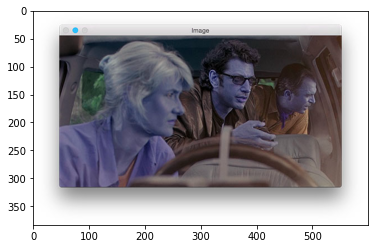

In [6]:
plt.imshow(jp)
plt.show()

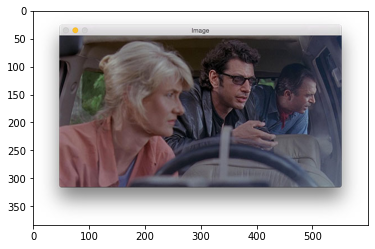

In [13]:
jp = cv.cvtColor(jp, cv.COLOR_BGR2RGB)# opencv convention in BRG
plt.imshow(jp)
plt.show()


In [7]:
jp[100,100]

array([58, 60, 70], dtype=uint8)

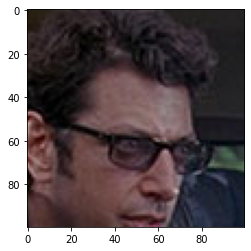

In [14]:
roi = jp[60:160, 320:420]
plt.imshow(roi)
plt.show()

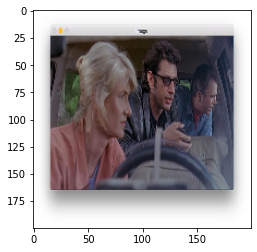

In [17]:
resiz = cv.resize(jp,(200,200))
plt.imshow(resiz)
plt.show()

In [22]:
jp.shape

(384, 600, 3)

Aspect ratio implementation

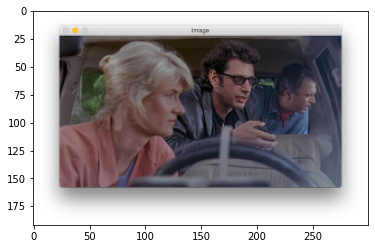

In [23]:

width = jp.shape[1]
height = jp.shape[0]
ratio = 300.0/width
dim  = (300,int(height*ratio))
resized = cv.resize(jp,dim)
plt.imshow(resized)
plt.show()

Image rotation

In [25]:
h,w,channels = jp.shape

In [26]:
center = (h//2,w//2)
center

(192, 300)

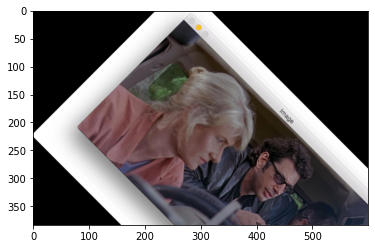

In [27]:
M = cv.getRotationMatrix2D(center, -45,1.0) # clockwise rotation
rotated = cv.warpAffine(jp,M,(w,h))
plt.imshow(rotated)
plt.show()

Smoothing

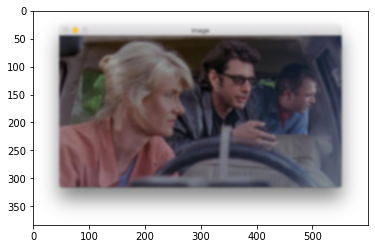

In [28]:
blurred = cv.GaussianBlur(jp,(11,11),0)
plt.imshow(blurred)
plt.show()

Drawing

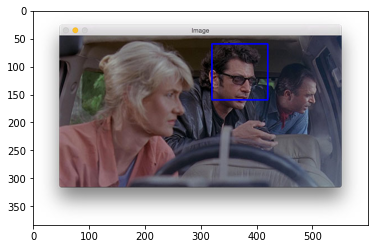

In [37]:
output = jp.copy()
cv.rectangle(output,(320, 60), (420, 160), (0, 0, 255), 2)
plt.imshow(output)
plt.show()

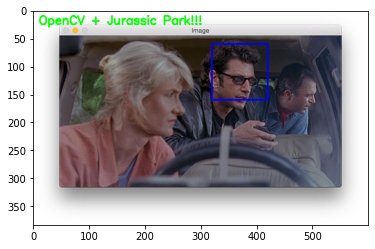

In [38]:

cv.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(output)

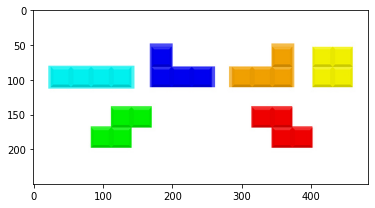

In [53]:
image = cv.imread("./images/tetris_blocks.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
# plt.show()

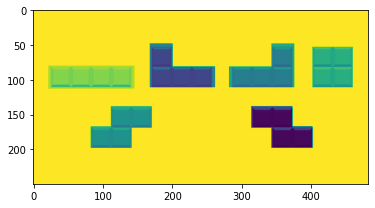

In [54]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

Edge detection

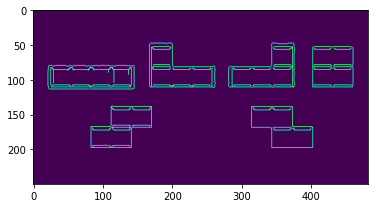

In [56]:
edged = cv.Canny(gray,30,50)
plt.imshow(edged)

Threshold

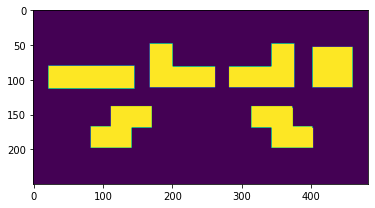

In [66]:
thresh = cv.threshold(gray,225,255,cv.THRESH_BINARY_INV)[1]
plt.imshow(thresh)

Detect and draw contours

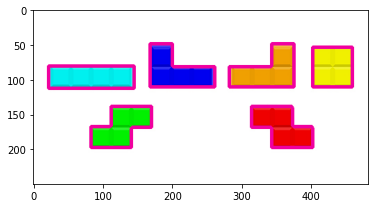

In [71]:
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,
    cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
    cv.drawContours(output, [c], -1, (240, 0, 159), 3)
    plt.imshow( output)


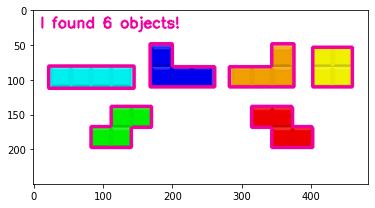

In [72]:
text = "I found {} objects!".format(len(cnts))
cv.putText(output, text, (10, 25),  cv.FONT_HERSHEY_SIMPLEX, 0.7,(240, 0, 159), 2)
plt.imshow( output)

Erosions and Dialations

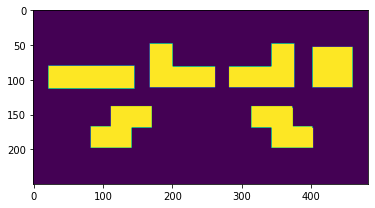

In [74]:
plt.imshow(thresh)

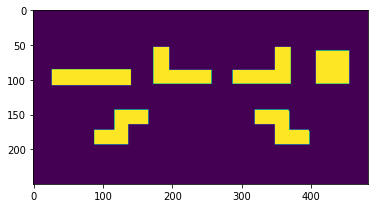

In [76]:
mask = thresh.copy()
mask = cv.erode(mask, None, iterations=5)
plt.imshow(mask)

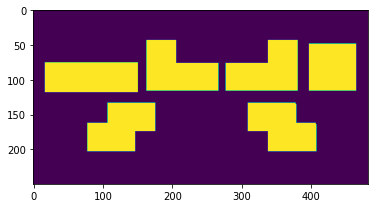

In [78]:
mask = thresh.copy()
mask = cv.dilate(mask,None,iterations=5)
plt.imshow(mask)

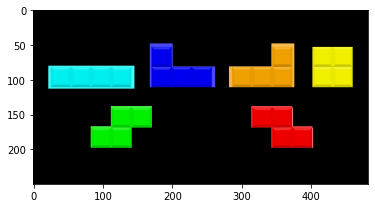

In [79]:
mask = thresh.copy()
output = cv.bitwise_and(image,image,mask=mask)
plt.imshow(output)

Color Detection

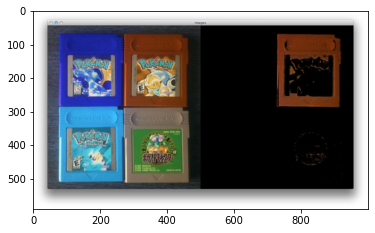

In [80]:
cold = cv.imread("./images/color_detection_blue_version.jpg")
plt.imshow(cold)

In [81]:
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]

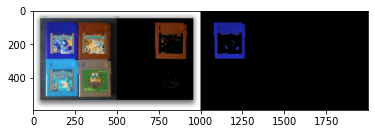

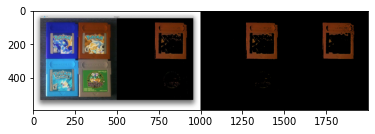

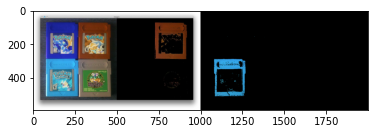

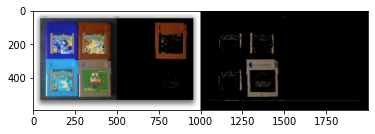

In [89]:
# loop over the boundaries
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv.inRange(cold, lower, upper)
    output = cv.bitwise_and(cold, cold, mask = mask)
    # show the images
    plt.imshow(np.hstack([cold, output]))
    plt.show()

In [84]:
np.hstack([image, output]).shape


(250, 964, 3)

Contours

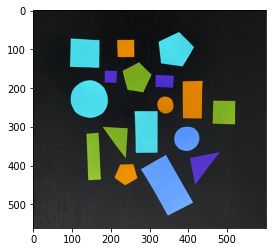

In [107]:
image = cv.imread("./images/shapes_and_colors.jpg")
plt.imshow(image)

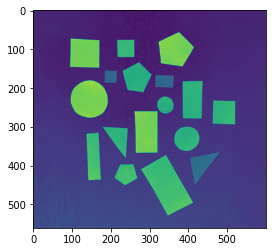

In [108]:
image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

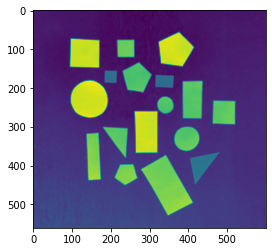

In [109]:
blurred = cv.GaussianBlur(gray, (5, 5), 0)
thresh = cv.threshold(blurred, 60, 255, cv.THRESH_BINARY)[1]
plt.imshow(blurred)


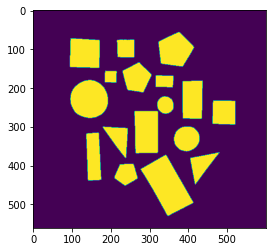

In [110]:
plt.imshow(thresh)

In [111]:
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

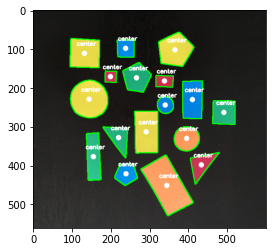

In [115]:
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv.moments(c)
# 	print(M)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv.putText(image, "center", (cX - 20, cY - 20),
		cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	plt.imshow(image)

Shape Detection

In [117]:
class ShapeDetector:
	def __init__(self):
		pass
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv.arcLength(c, True)
		approx = cv.approxPolyDP(c, 0.04 * peri, True)
		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape